In [1]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import io

dataset = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Mounted at /content/drive


In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
target_cols=list(dataset.columns[-1:])
target_cols

['Class']

In [5]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [6]:
#split dataset in features and target variable
X = dataset.drop('Class', axis=1) # Features
y = dataset['Class'] # Target variable

In [7]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
print(X.shape)

(284807, 30)


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [11]:
print(y.shape)

(284807,)


In [12]:
# Split dataset into training set and test set
train_x, test_x, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# Check the shape of all of these
print("X_train shape is : ", train_x.shape)
print("X_test shape  is : ", test_x.shape)
print("y_train shape is : ", train_Y.shape)
print("y_test shape is  : ", test_Y.shape)

X_train shape is :  (199364, 30)
X_test shape  is :  (85443, 30)
y_train shape is :  (199364,)
y_test shape is  :  (85443,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_x, train_Y)

LogisticRegression()

In [16]:
y_pred=logreg.predict(test_x)

In [18]:
cnf_matrix = metrics.confusion_matrix(test_Y, y_pred)
cnf_matrix

array([[85271,    37],
       [   50,    85]])

Text(0.5, 257.44, 'Predicted label')

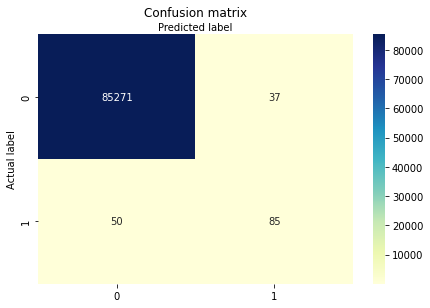

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))
print("Precision:",metrics.precision_score(test_Y, y_pred))
print("Recall:",metrics.recall_score(test_Y, y_pred))

Accuracy: 0.9989817773252344
Precision: 0.6967213114754098
Recall: 0.6296296296296297


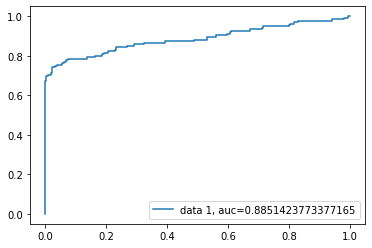

In [21]:
y_pred_proba = logreg.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_Y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4)
plt.show()